In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('HousePrice.csv')
df.head()

,Area,Price
0,2422,32500
1,2130,27000
2,1900,24000
3,3100,44000
4,2700,36000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Area    19 non-null     int64
 1   Price   19 non-null     int64
dtypes: int64(2)
memory usage: 432.0 bytes


In [5]:
df.isnull().sum()

Area     0
Price    0
dtype: int64

# Splitting the data

In [6]:
x = df.iloc[0:,0].values.reshape(-1,1)
y = df.iloc[0:,1].values.reshape(-1,1)

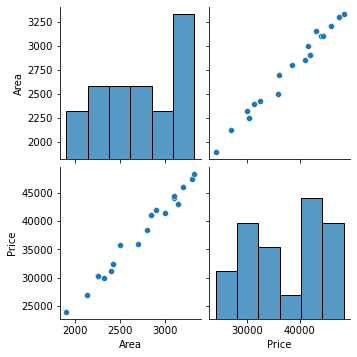

In [7]:
sns.pairplot(df);

# Plotting the graph

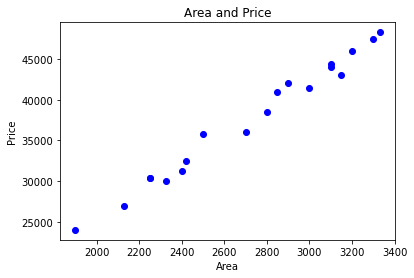

In [8]:
plt.scatter(x,y,color = 'blue')
plt.title("Area and Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

# Model Selection

In [9]:
from sklearn.model_selection import train_test_split

# Splitting the data for training and testing

In [10]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.30,random_state=0)

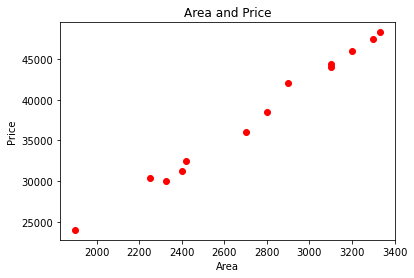

In [11]:
plt.scatter(train_x,train_y,color = 'red')
plt.title("Area and Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

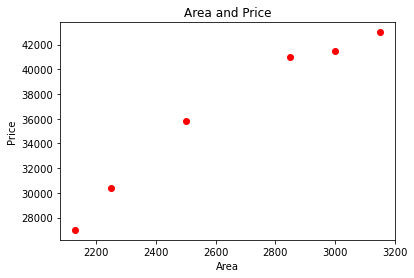

In [12]:
#Visualising the testing data
plt.scatter(test_x,test_y,color = 'red')
plt.title("Area and Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

# Model Selection

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

# Plotting the data by using regression line

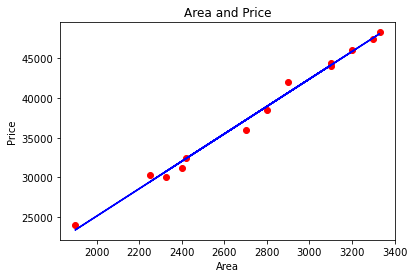

In [15]:
plt.scatter(train_x,train_y,color = 'red')
plt.plot(train_x,model.predict(train_x),color = 'blue')
plt.title("Area and Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [16]:
model1 = LinearRegression()
model1.fit(test_x,test_y)

LinearRegression()

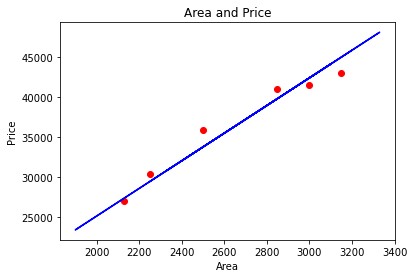

In [17]:
plt.scatter(test_x,test_y,color = 'red')
plt.plot(train_x,model.predict(train_x),color = 'blue')
plt.title("Area and Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [18]:
pred_y = model.predict(train_x)
pred_y

array([[45868.78518126],
       [37223.78200091],
       [23391.77691236],
       [40681.78327305],
       [48116.48600815],
       [47597.78581733],
       [38952.78263698],
       [32036.7800927 ],
       [30740.02961565],
       [44139.78454519],
       [32417.16023264],
       [44139.78454519],
       [29443.2791386 ]])

In [19]:
pred = model1.predict(test_x)
pred

array([[44239.70069337],
       [28467.45955316],
       [41920.25346687],
       [34188.76271186],
       [39600.80624037],
       [30323.01733436]])

# Predicting R-squared values

In [20]:
from sklearn.metrics import r2_score

In [21]:
r_sq_tr = r2_score(train_y,pred_y)
r_sq_tr

0.9919804791638868

In [22]:
r_sq_ts = r2_score(test_y,pred)
r_sq_ts

0.9601433261305647

# Templet fro Simple LinearRegression

In [23]:
import numpy as np

In [24]:
are_sq = 1900
tr_sq_are = np.reshape(are_sq,(1,1))
discount_val = model1.predict(tr_sq_are)

In [25]:
discount_val

array([[24910.97380586]])

In [26]:
#another method for creating two dimensional array
test_area = np.array([[1900]])
discount = model1.predict(test_area)
discount

array([[24910.97380586]])

# Multiple Linear Regression-No Dummies

In [27]:
land = pd.read_csv('landprice2.csv')
land.head()

,Area,Distance,Crime Rate,Price,City
0,89,4,3.84,7.0,Zurich
1,66,1,3.19,5.4,Jeneva
2,78,3,3.78,6.6,Interlaken
3,111,6,3.89,7.4,Jeneva
4,44,1,3.57,4.8,Zurich


In [30]:
land.isnull().sum()

Area          0
Distance      0
Crime Rate    0
Price         0
City          0
dtype: int64

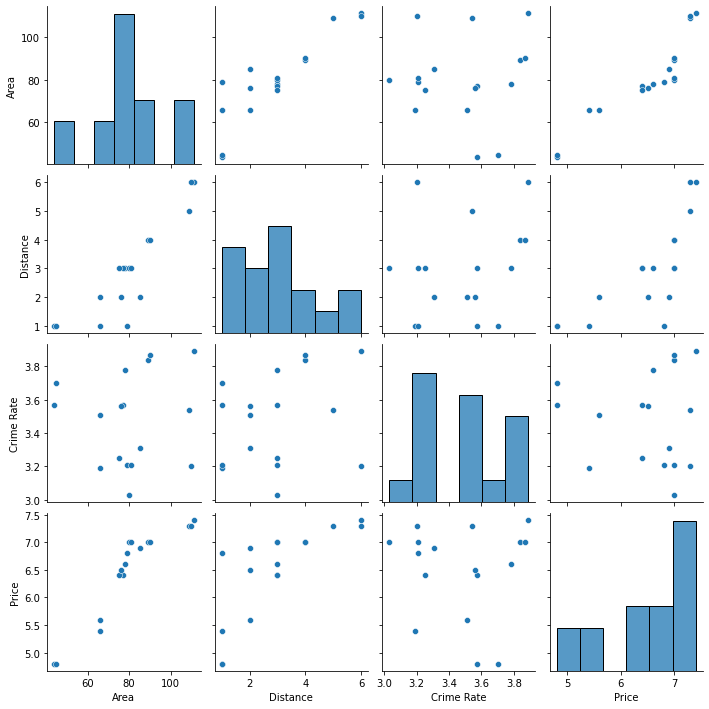

In [28]:
sns.pairplot(land);

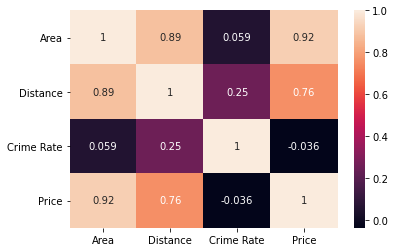

In [29]:
sns.heatmap(land.corr(),annot = True);

# Removing Column line
* Which is Categorical data column

In [31]:
dataset = land.drop(['City'],axis=1)
dataset.head()

,Area,Distance,Crime Rate,Price
0,89,4,3.84,7.0
1,66,1,3.19,5.4
2,78,3,3.78,6.6
3,111,6,3.89,7.4
4,44,1,3.57,4.8


In [32]:
x = land.iloc[0:,0:3].values
y = land.iloc[0:,3].values
y

array([7. , 5.4, 6.6, 7.4, 4.8, 6.4, 7. , 5.6, 7.3, 6.4, 6.9, 7.3, 4.8,
       6.8, 7. , 6.5, 7. ])

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.40,random_state=0)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model2 = LinearRegression()
model2.fit(train_x,train_y)

LinearRegression()

In [37]:
predict = model2.predict(train_x)
predict

array([6.83903338, 7.0606325 , 5.90458352, 6.53468089, 7.48309664,
       7.57465682, 6.77641177, 6.30524067, 6.51983807, 4.90182572])

In [38]:
predict1 = model2.predict(test_x)
predict1


array([6.16689479, 6.46548233, 7.71304025, 6.1685974 , 6.96475262,
       4.83481948, 6.37575462])

In [39]:
from sklearn.metrics import r2_score

In [40]:
r_square = r2_score(test_y,predict1)
r_square

0.7595914804889798

In [41]:
r_sqrr = r2_score(train_y,predict)
r_sqrr

0.9173871282001105

# SLR--Dummy Variabels

In [42]:
land.head()

,Area,Distance,Crime Rate,Price,City
0,89,4,3.84,7.0,Zurich
1,66,1,3.19,5.4,Jeneva
2,78,3,3.78,6.6,Interlaken
3,111,6,3.89,7.4,Jeneva
4,44,1,3.57,4.8,Zurich


* Converting Categorical data to numerical data to add into data set

In [43]:
# We need to check which country is to identify its an important
dummy = pd.get_dummies(land.City).iloc[:,0:2]
dummy.head()

,Interlaken,Jeneva
0,0,0
1,0,1
2,1,0
3,0,1
4,0,0


# To add twom Data sets

In [44]:
land1 = pd.concat([land,dummy],axis=1)
land1.head()

,Area,Distance,Crime Rate,Price,City,Interlaken,Jeneva
0,89,4,3.84,7.0,Zurich,0,0
1,66,1,3.19,5.4,Jeneva,0,1
2,78,3,3.78,6.6,Interlaken,1,0
3,111,6,3.89,7.4,Jeneva,0,1
4,44,1,3.57,4.8,Zurich,0,0


# To remove column in a dataset

In [45]:
data = land1.drop(['City'],axis=1)
data.head()

,Area,Distance,Crime Rate,Price,Interlaken,Jeneva
0,89,4,3.84,7.0,0,0
1,66,1,3.19,5.4,0,1
2,78,3,3.78,6.6,1,0
3,111,6,3.89,7.4,0,1
4,44,1,3.57,4.8,0,0


# Sorting the columns

In [46]:
df = data.sort_index(axis=1,ascending=True)
df.head()

,Area,Crime Rate,Distance,Interlaken,Jeneva,Price
0,89,3.84,4,0,0,7.0
1,66,3.19,1,0,1,5.4
2,78,3.78,3,1,0,6.6
3,111,3.89,6,0,1,7.4
4,44,3.57,1,0,0,4.8


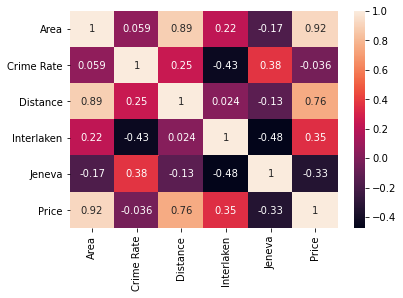

In [47]:
sns.heatmap(df.corr(),annot=True);

In [48]:
x = df.iloc[:,:5].values
x

array([[ 89.  ,   3.84,   4.  ,   0.  ,   0.  ],
       [ 66.  ,   3.19,   1.  ,   0.  ,   1.  ],
       [ 78.  ,   3.78,   3.  ,   1.  ,   0.  ],
       [111.  ,   3.89,   6.  ,   0.  ,   1.  ],
       [ 44.  ,   3.57,   1.  ,   0.  ,   0.  ],
       [ 77.  ,   3.57,   3.  ,   0.  ,   0.  ],
       [ 80.  ,   3.03,   3.  ,   1.  ,   0.  ],
       [ 66.  ,   3.51,   2.  ,   0.  ,   1.  ],
       [109.  ,   3.54,   5.  ,   0.  ,   0.  ],
       [ 75.  ,   3.25,   3.  ,   0.  ,   0.  ],
       [ 85.  ,   3.31,   2.  ,   1.  ,   0.  ],
       [110.  ,   3.2 ,   6.  ,   1.  ,   0.  ],
       [ 45.  ,   3.7 ,   1.  ,   0.  ,   1.  ],
       [ 79.  ,   3.21,   1.  ,   1.  ,   0.  ],
       [ 90.  ,   3.87,   4.  ,   0.  ,   1.  ],
       [ 76.  ,   3.56,   2.  ,   0.  ,   1.  ],
       [ 81.  ,   3.21,   3.  ,   0.  ,   0.  ]])

In [49]:
y = df.iloc[:,5].values.reshape(-1,1)
y

array([[7. ],
       [5.4],
       [6.6],
       [7.4],
       [4.8],
       [6.4],
       [7. ],
       [5.6],
       [7.3],
       [6.4],
       [6.9],
       [7.3],
       [4.8],
       [6.8],
       [7. ],
       [6.5],
       [7. ]])

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.40,random_state=0)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [54]:
pred = model.predict(train_x)
pred

array([[6.75622019],
       [6.91337975],
       [5.8200165 ],
       [6.8424012 ],
       [7.28662025],
       [7.51245825],
       [7.00982535],
       [6.54777345],
       [6.49272534],
       [4.71857973]])

In [55]:
from sklearn.metrics import r2_score

In [56]:
pred_tr = model.predict(train_x)
r2 = r2_score(train_y,pred_tr)
r2

0.9708976718744526

In [57]:
pred1 = model.predict(test_x)
pred1

array([[6.17260958],
       [6.26308468],
       [8.0510495 ],
       [6.43407039],
       [6.84554212],
       [4.97890705],
       [6.07745447]])

In [58]:
pred_ts = model.predict(test_x)
r2 = r2_score(test_y,pred_ts)
r2

0.5888385604365789

# Removing "Crimerate&Distance"

In [59]:
df1 = df.drop(['Crime Rate','Distance'],axis=1)
df1.head()

,Area,Interlaken,Jeneva,Price
0,89,0,0,7.0
1,66,0,1,5.4
2,78,1,0,6.6
3,111,0,1,7.4
4,44,0,0,4.8


<AxesSubplot:>

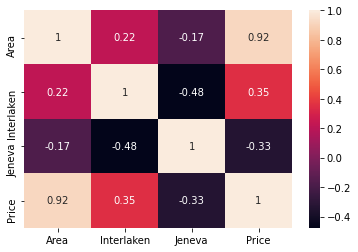

In [60]:
sns.heatmap(df1.corr(),annot=True)

In [61]:
x = df1.iloc[:,:3].values
y = df1.iloc[:,3].values.reshape(-1,1)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.40,random_state=0)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
model3 = LinearRegression()
model3.fit(train_x,train_y)

LinearRegression()

In [66]:
pred3 = model3.predict(train_x)
pred3

array([[6.73891891],
       [6.61721884],
       [5.81197909],
       [6.74850334],
       [7.58278116],
       [7.54999125],
       [7.05748328],
       [6.59401337],
       [6.19820401],
       [5.00090675]])

In [67]:
model3.fit(test_x,test_y)

LinearRegression()

In [68]:
pred4  =model3.predict(test_x)
pred4

array([[5.4       ],
       [6.83842155],
       [7.43457782],
       [6.12824512],
       [6.8       ],
       [4.93717706],
       [6.76157845]])

In [69]:
from sklearn.metrics import r2_score

In [70]:
r1 = r2_score(test_y,pred4)
r1

0.9666969495657765

From this model a slightly increase in "r_sqare" but it is not very good,Beacuse still we have the "MULTI COLINIARITY" problem.
when multi colinearity occure when we are including variables that are highly corelated each other.
This causes some serious problem to our data set.So we need to keep only one variable either "Area" or "Distance".
Which is corelated to "Price"

# MLR --ForwardSelection--NaN Values

In [71]:
nan = pd.read_csv('landpric.csv')
nan.head()

,Area,Distance,Crime Rate,Price
0,89.0,4.0,3.84,7.0
1,66.0,1.0,3.19,5.4
2,78.0,3.0,3.78,6.6
3,111.0,6.0,3.89,7.4
4,44.0,1.0,3.57,4.8


In [ ]:
nan.isnull().sum()

In [ ]:
sns.pairplot(nan);

In [ ]:
sns.heatmap(nan.corr(),annot=True)

# Removing NaN Values

In [ ]:
landprice1 = nan.dropna()
landprice1.head()

In [ ]:
landprice1.isnull().sum()

In [ ]:
sns.pairplot(landprice1)

In [ ]:
sns.heatmap(landprice1.corr(),annot=True)

In [ ]:
x = landprice1.iloc[0:,0:3].values
y = landprice1.iloc[0:,3].values.reshape(-1,1)

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.40,random_state=0)

In [ ]:
linear = LinearRegression()
linear.fit(train_x,train_y)

In [ ]:
liner1 = LinearRegression()
liner1.fit(test_x,test_y)

# Predicting R-Squrred Vaalues

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
pred_lr = linear.predict(train_x)
r_lr = r2_score(train_y,pred_lr)
r_lr

In [ ]:
pred_lr_ts = liner1.predict(test_x)
r_ts = r2_score(test_y,pred_lr_ts)
r_ts

# Relation b/w "Area and Price"

In [ ]:
landprice1.head()

In [ ]:
x_ar = landprice1.iloc[0:,0].values.reshape(-1,1)
y_ar = landprice1.iloc[0:,3].values.reshape(-1,1)

In [ ]:
# Visualising the data
plt.scatter(x_ar,y_ar,color = 'red')
plt.title("Area and Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

# Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(x_ar,y_ar,test_size = 0.40,random_state=0)

# Import Model Selection

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
slr = LinearRegression()
slr.fit(train_x,train_y)

In [ ]:
#Visualising the training data
plt.scatter(train_x,train_y,color = 'red')
plt.plot(train_x,slr.predict(train_x),color = 'blue')
plt.title("Area and Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()


In [ ]:
mlr = LinearRegression()
mlr.fit(test_x,test_y)

In [ ]:
plt.scatter(test_x,test_y,color = 'red')
plt.plot(test_x,mlr.predict(test_x),color = 'blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area and Price")
plt.show()

# Predicting Values

In [ ]:
slr_pred = slr.predict(train_x)
slr_pred

In [ ]:
mlr_pred = mlr.predict(test_x)
mlr_pred

# Predicting R-Squared

In [ ]:
# Training data
predict_tr = slr.predict(train_x)
r_sqare = r2_score(train_y,predict_tr)
r_square

In [ ]:
#Testing data
predict_ts = mlr.predict(test_x)
r_square = r2_score(test_y,predict_ts)
r_square

# Template for Area and price

In [ ]:
area_sq = 89
price_are = np.reshape(area_sq,(1,1))
discount_val = mlr.predict(price_are)
discount_val